> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (IMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [135]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

<a id='Questions'></a>
## Step 1 : Questions 

In this analysis , we will analyze data related to IMDB movies and try to answer some questions that i found intereseting .

Question 1: Which Genre is most likely to earn high revenue?

Question 2: Which are the most successful Actor Director combo?


<a id='wrangling'></a>
## Step 2 : Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [136]:
#Gather or load all the data
data=pd.read_csv('tmdb-movies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In the datasets used for answering the questions,  fields such as 'genres', 'name of director' and 'name of actors' cannot be replaced with mean or any other values as it might affect our results.
Thus, for handling the missing values i am dropping the rows with missing values.
Dropping the rows is necessary.

In [137]:
#Fetching the data required to answer the questions

#Data for answering question 1
new_data=data[['id','imdb_id','revenue','genres']].copy()
#Missing data
data1=new_data.dropna(axis=0).copy()

#Data for answering question 2
data2=data[['cast','director','budget','revenue']].copy()
data2=data2.dropna(axis=0).copy()
#data2=new_data.copy()

#Missing data(genre information not required to answer question 1) 
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 0 to 10865
Data columns (total 4 columns):
cast        10752 non-null object
director    10752 non-null object
budget      10752 non-null int64
revenue     10752 non-null int64
dtypes: int64(2), object(2)
memory usage: 420.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Which Genre is most likely to earn high revenue?


In [138]:
def best_genre():
    genres={}
    revenue=[]
    for _,i in data1.iterrows():
        rev=i[2]
        gen=i[3].split('|')
        revenue.append(i[2])
        for j in gen:
            if j not in genres.keys():
                genres[j]=[1,rev]
            else:
                genres[j][0]=genres[j][0]+1
                genres[j][1]=genres[j][1]+rev
    for i in genres:
        genres[i]=genres[i][1]/genres[i][0]
    return genres,revenue
genres,revenue=best_genre()
a=max(zip(genres.values(), genres.keys()))
print(a[1],"is the most watched genre")

Adventure is the most watched genre


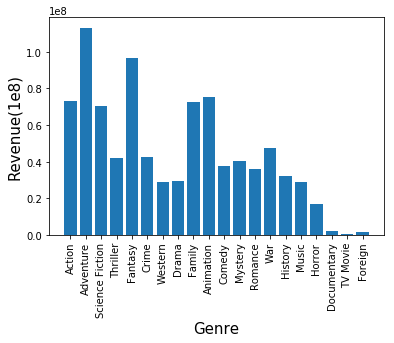

In [139]:
plt.bar(range(len(genres)), list(genres.values()), align='center')
plt.xticks(range(len(genres)), list(genres.keys()),rotation='vertical')
plt.xlabel('Genre',size=15)
plt.ylabel('Revenue(1e8)',size=15)
plt.show()

## Description(Bar chart)

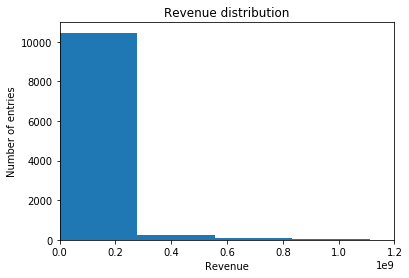

In [140]:
plt.hist(revenue)
plt.xlim((0.0e9,1.2e9))
plt.xlabel('Revenue')
plt.ylabel('Number of entries')
plt.title('Revenue distribution')
plt.show()

## Description(Histogram)

## Which are the most successful Actor Director combo?

In [141]:
def act_direct():
    data2['money_earned']=data2['revenue']-data2['budget']
    datab=defaultdict(int)
    databnum=defaultdict(int)
    final_data=defaultdict(int)
    for i in data2.iterrows():
        cast=i[1][0].split('|')
        director=i[1][1]
        money=i[1][4]
        for j in cast:
            combo=j+"_"+director
            datab[combo]+=money
            databnum[combo]+=1
    for i in datab.keys():
            final_data[i]=datab[i]/databnum[i]

    print("Top Actor Director Combo is : ")
    count=0
    top5=[]
    check5=[]
    rev5=[]
    a=max(zip(final_data.values(), final_data.keys()))
    actors=''
    director=a[1].split('_')[1]
    visual=defaultdict(int)
    for key,val in zip(final_data.keys(),final_data.values()):
        if key.split('_')[1]==director and key.split('_')[0]!=director:
            visual[key.split('_')[0]]=val
        if val==a[0] and key.split('_')[1]==director:
            if actors=='':
                actors=key.split('_')[0]
            else:
                actors=actors+'|'+key.split('_')[0]
    output=actors+" and "+director
    return output,visual
output,visual=act_direct()
print(output)

Top Actor Director Combo is : 
Sam Worthington|Zoe Saldana|Stephen Lang|Michelle Rodriguez and James Cameron


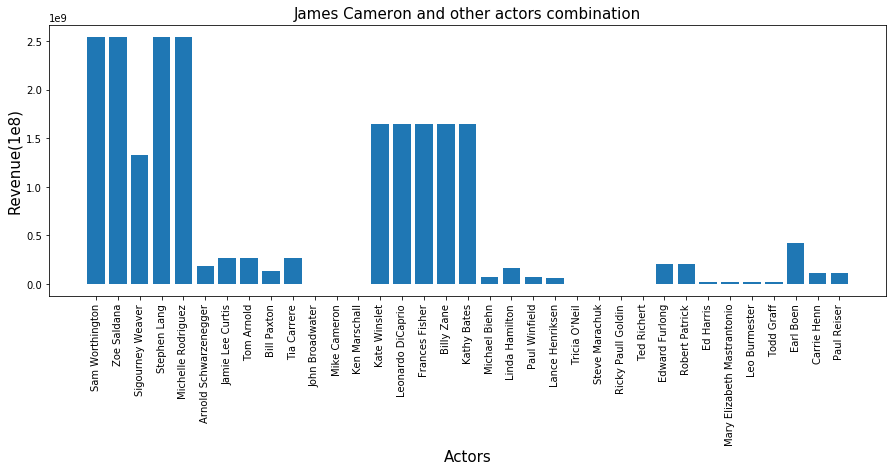

In [142]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(visual.keys())), list(visual.values()), align='center')
plt.xticks(range(len(visual.values())), list(visual.keys()),rotation='vertical')
plt.title(director+' and other actors combination',size=15)
plt.xlabel('Actors',size=15)
plt.ylabel('Revenue(1e8)',size=15)
plt.show()

## Description 

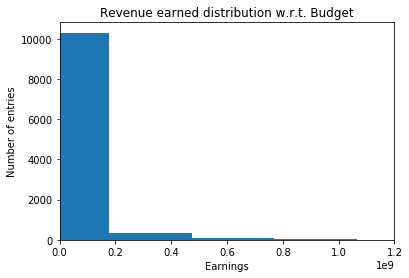

In [143]:
plt.hist(data2['money_earned'])
plt.xlim((0.0e9,1.2e9))
plt.xlabel('Earnings')
plt.ylabel('Number of entries')
plt.title('Revenue earned distribution w.r.t. Budget')
plt.show()

## Description 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!